# Rock-Paper-Scissor image classifier project

## Content   
&nbsp;&nbsp;&nbsp; **1. Aims and objectives**   
&nbsp;&nbsp;&nbsp; **2. Method**   
&nbsp;&nbsp;&nbsp; **3. Result**   
&nbsp;&nbsp;&nbsp; **4. Discussion**   

## 1. Aims and objectives
    
The focus of this project is on classifying three options of a hand game called 'Rock paper scissors', using tensorflow in python environment. The option consists of the three handsigns: Rock, paper, and scissors. In order to achieve the main objective, the project is divided into several parts:
    
   **Stage 1**: Build python environment for using tensorflow, image dataset, etc. The appropriate libraries and packages are required.
   
   **Stage 2**: Data acquisition. This stage includes taking pictures, and gathering images from other sources for both train and test data.   
   
   **Stage 3**: Design the model. The class and model chosen for the training produce two 2-dimensional convolutional layers and two dense layers.   
   
   **Stage 4**: Train the model using the train dataset.   
   
   **Stage 5**: Validate the result using the test dataset.   
   

## 2. Method

 ### Data acquisition
    
Some machine learning algorithm requires input dataset to predict the output. The training and testing data for this project will be image files and collected by 1. directly taking pictures and 2. downloading from other resources. First, visual or audible project resources such as image, video, or pose can be trained on the website provided by [Teachable Machine](https://teachablemachine.withgoogle.com/). 300 pictures had been taken in total for each handsign with the laptop webcam equipped.   
   
![1](./The-very-first-repository/taking_pictures.png)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *Figure 1: Taking pictures of rocks on Teachable Machine*   

Figure 1 shows how the service took pictures rapidly.
Other images were collected by colleagues and online datasets provided by tensorflow ([Tensorflow rock-paper-scissors datasets](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors))

The images obtained had been resized by 28x28 resolution.
PIL library which contains image resize methods can be installed with:

    !pip install pillow

And the images for each handsign were resized.
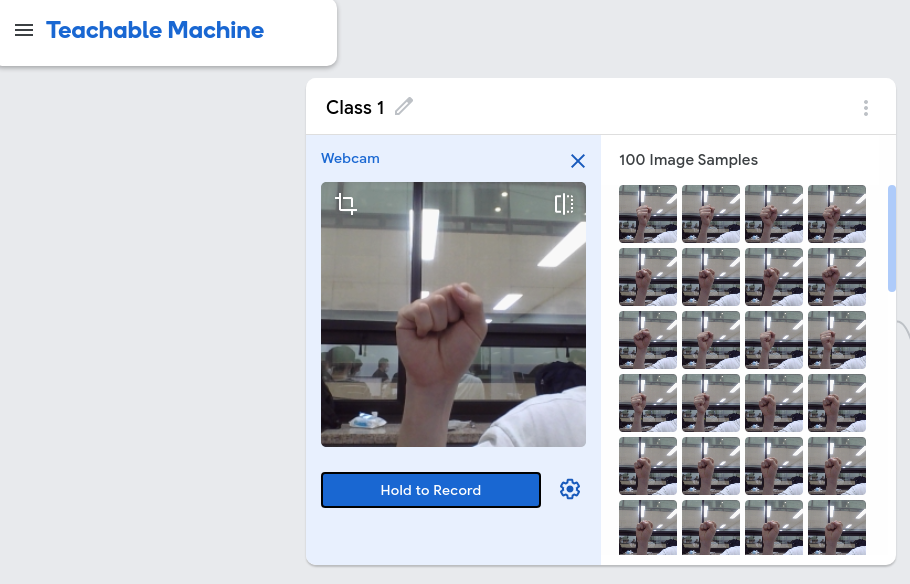

In [ ]:
from PIL import Image
import os, glob
    
#first, scissor images
image_dir_path = os.getenv("HOME") + "/Desktop/rock_scissor_paper/Scissor"
images=glob.glob(image_dir_path + "/*.jpg")
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,'jpeg')
    
#rock images
image_dir_path = os.getenv("HOME") + "/Desktop/rock_scissor_paper/Rock"
images=glob.glob(image_dir_path + "/*.jpg")
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,'jpeg')

#last, paper images
image_dir_path = os.getenv("HOME") + "/Desktop/rock_scissor_paper/Paper"
images=glob.glob(image_dir_path + "/*.jpg")
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,'jpeg')


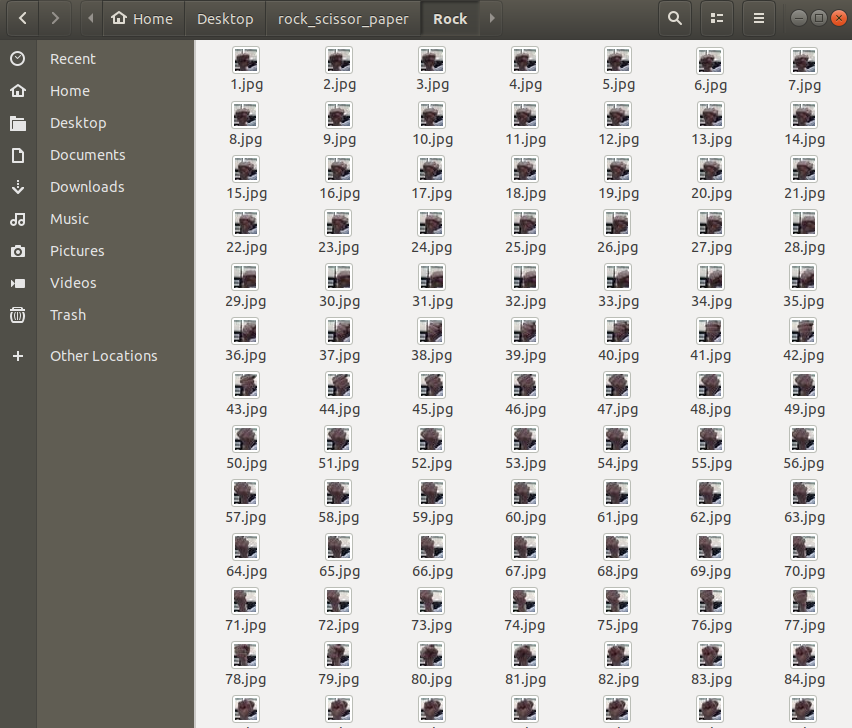
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *Figure 2: Resized rock images*

### Retrieving datasets

Each handsign was labelled with an integer: 0 for scissors, 1 for rocks, and 2 for papers.   

In [ ]:
import numpy as np

def load_data(img_path):
    # Scissor : 0, Rock : 1, Paper : 2
    number_of_data=4380   # Be carefull with the total number of data.
    img_size=28
    color=3
    #Creating a matrix which involves image and label data.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/Scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Copying the image matrix to data.
        labels[idx]= 0  
        idx=idx+1

    for file in glob.iglob(img_path+'/Rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Copying the image matrix to data.
        labels[idx]=1  
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/Paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Copying the image matrix to data.
        labels[idx]=2   
        idx=idx+1
        
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Desktop/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # Normalise


Just to check the code,

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[122])
print('Label: ', y_train[122]) 

which outputs

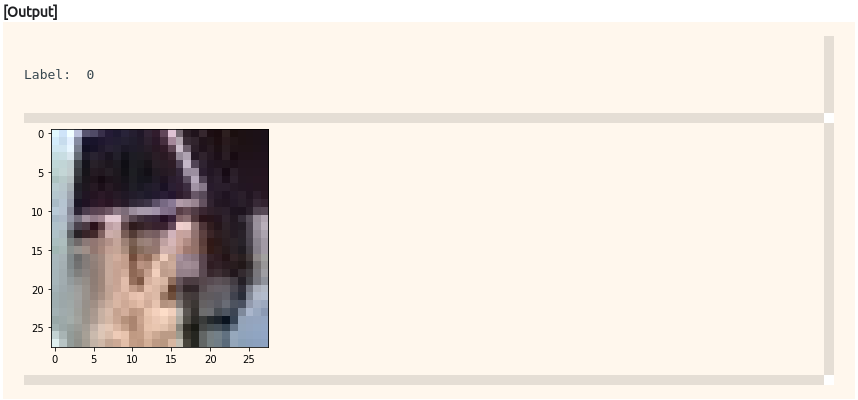
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *Figure 3: Output checking*



### Build the model


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=10 # Four hyperparameters.

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))



### Train the model

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

### Test the model

Test datasets could be obtained from other colleagues. 300 images in totol (100 each) had been tested. Test datasets were obtained in a similar way. 

In [ ]:
def load_data(img_path):
    number_of_data=300   
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/Scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]= 0  
        idx=idx+1

    for file in glob.iglob(img_path+'/Rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/Paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=2   
        idx=idx+1
                
    return imgs, labels
        
image_dir_path_1 = os.getenv("HOME") + "/Desktop/rock_scissor_paper_yesic"
(x_test, y_test)=load_data(image_dir_path_1)
x_test_norm = x_test/255.0

and then tested with model.evaluate():

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

## 3. Result

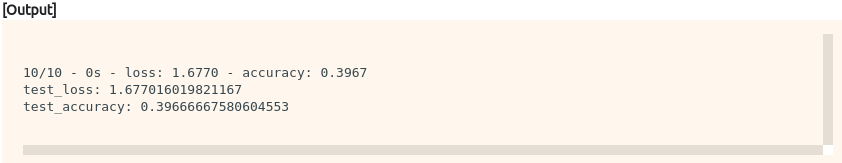
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *Figure 4: First output*   
As can be seen in figure 4, the model with initial conditions produce poor accuracy. Accordingly, two measures were taken to increase the accuracy.   
- 1360 more Training image was added to each, 4080 in total.
- Hyperparameters had been adjusted.




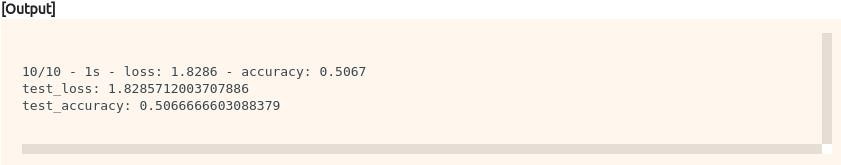
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *Figure 5: Second output*

Figure 5 represents better accuracy with additional images and the same hyperparameters.

## 4. Discussion and conclusion

Overally, the input datasets and model designed could be considered poor by comparison. To achieve better accuracy, some measures are suggested:

- Increasing the input data
   
- Adjusting the hyperparameters:   
Four hyperparameters, n_channel_1, n_channel_2, n_dense, and n_train_epoch, had been employed for the convolutional model. Adjusting the value could increase the accuracy. 
   
- High resolution image:   
Comparing with MNIST handwritten digit classification project, the images in this project contain much more factors to consider e.g. illumination, surroundings, or other objects.   
   
- Using different model (the number of layers...):     
Increasing the number of layers is also an acceptable idea to increase the accuracy.